# AMATH 515 Homework 4

**Due Date: 03/17/2021**

*Homework Instructions*: Please follow order of this notebook and fill in the gaps where commented as `TODO`. You will need to submit both `515HW4_Coding` and `solvers.py` to Gradescope. You will have **10 attempts** to pass the tests.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Please complete the code in `solvers.py`

In [2]:
import sys
sys.path.append('./')
from solvers import *

## Interior Point Method

Consider the problem that minimize a quadratic objective over a box constraint,

$$
\min_x~\frac{1}{2}\|Ax - b\|^2, \quad \text{s.t.}~l \le x \le u
$$

* providing $l$ and $u$, convert the constraint $l \le x \le u$ to the form of $Cx \le d$.
* use the test case to test the code

In [3]:
np.random.seed(123)
m = 20
n = 10
l = np.zeros(n)
u = np.ones(n)
#
A  = np.random.randn(m, n)
xt = -np.random.rand(n)
b  = A.dot(xt)

In [4]:
#==GRADED==#
# TODO: create C and d used for the solver
C = np.vstack([np.eye(n),-np.eye(n)])
d = np.hstack([u,-l])

In [5]:
#==GRADED==#
x0_ip = 0.5*(l + u)
x_ip, obj_his_ip, err_his_ip, exit_flag_ip = optimizeWithIP(x0_ip, A, b, C, d)

Text(0.5, 0.98, 'Interior Point on Quadratic over Box')

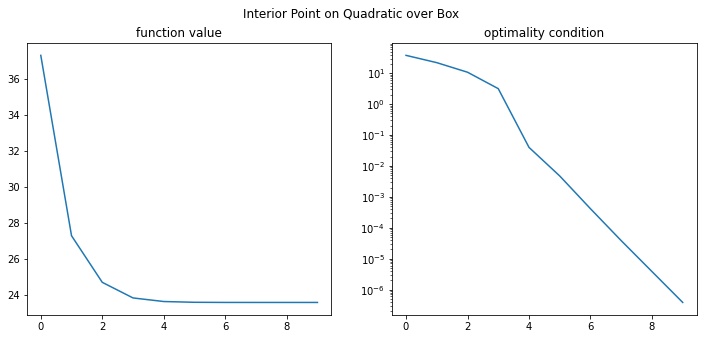

In [6]:
# plot result
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(obj_his_ip)
ax[0].set_title('function value')
ax[1].semilogy(err_his_ip)
ax[1].set_title('optimality condition')
fig.suptitle('Interior Point on Quadratic over Box')

## Chambolle-Pock Algorithm

Consider problem,
$$
\min_x~\|Ax - b\|_1 + \lambda\|x\|_1
$$

* relate this problem to our general $h(Ax-b) + k(x) + c^Tx$ template, namely figure out what are $c$, $h$ and $k$.
* solve the problem using Chambolle-Pock Algorithm

In [7]:
np.random.seed(123)
m = 100
n = 200
k = 10
#
A  = np.random.randn(m, n)
xt = np.zeros(n)
xt[np.random.choice(n, k, replace=False)] = np.random.choice([-1.0, 1.0], k)
b  = A.dot(xt)
#
lam = 0.1

In [8]:
# TODO: define c and function h, k, prox_ch, prox_k
c = np.zeros(n)
#
def h(x):
    return np.linalg.norm(x,ord=1)
def k(x):
    return np.linalg.norm(x,ord=1)
#==GRADED==#
def prox_ch(z, t):
    return np.clip(z,-1,1)
def prox_k(z, t):
    return (z-t*lam).clip(0,None)-(-z-t*lam).clip(0,None)

In [9]:
#==GRADED==#
np.random.seed(123)
x_test = np.random.randn(n)
prox_ch_test = prox_ch(x_test, 0.5)
prox_k_test = prox_k(x_test, 0.5)

In [10]:
#==GRADED==#
x0_cp = np.zeros(n)
x_cp, obj_his_cp, err_his_cp, exit_flag_cp = optimizeWithCP(x0_cp, A, b, c, h, k, prox_ch, prox_k)

Text(0.5, 0.98, 'Chambolle-Pock on LAD-Lasso')

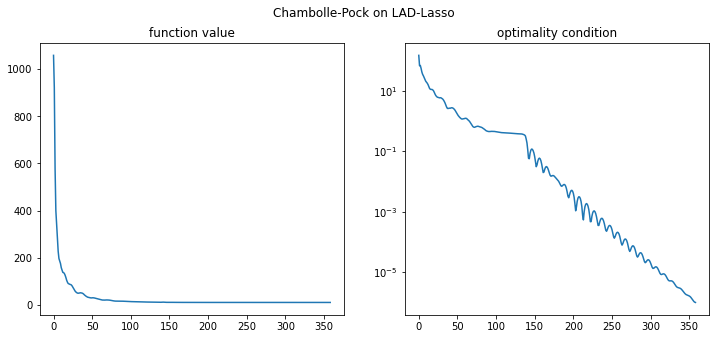

In [11]:
# plot result
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(obj_his_cp)
ax[0].set_title('function value')
ax[1].semilogy(err_his_cp)
ax[1].set_title('optimality condition')
fig.suptitle('Chambolle-Pock on LAD-Lasso')

Text(0.5, 1.0, 'signal recovery')

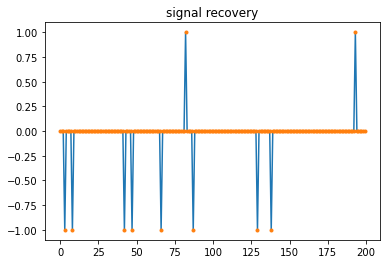

In [12]:
plt.plot(xt)
plt.plot(x_cp, '.')
plt.title('signal recovery')